# hide_toggle() setup
- if needed, put hide_toggle() at the end of a cell

In [2]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

hide_toggle()

# Original Setup of Kendall Tau

### g_new, L_lim1

In [3]:
def g_new(z, k):
    Z = z+1
    Z_c = 3.5
    return Z**k/(1+Z/Z_c)**k

def L_lim1(F_lim, z_i, d_Li, g=g_new, k=0):
    return (F_lim*1e-26)*4*math.pi*(d_Li*3.08567758e25)**2/g(z_i, k)

hide_toggle()

### sort_by_first, kendall_tau, importing packages

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sort_by_first(A, B): #SORT USING Z!
    list1, list2 = zip(*sorted(zip(A, B)))
    return list(list1), list(list2)

#original setup of Kendall Tau, using a generic F_lim,z --> L converter

def kendall_tau(L, z, F_lim, srted=False, func=L_lim1):
    
    #if necessary, sort by z while keeping reference to L
    if not srted:
        z, L = sort_by_first(z, L)
        
    R = []
    E = []
    V = []
    
    for i in range(len(L)):
        higher = 0
        lower = 0
        
        if(L[i] < func(F_lim, z[i])): #don't include sources that are not above flux limit
            continue
        
        for j in range(0, i): #since sorted by now, only j < i has z_j < z_i
            if(L[j] >= func(F_lim, z[i]) and z[j] <= z[i]): #associated set requirements
                if(L[j] > L[i]):
                    higher += 1
                else:
                    lower += 1
        
        R.append((lower+1)/(higher+lower+1))
        E.append(0.5)
        V.append(1/12)
    
    numer = sum(R) - sum(E)
    denom = (sum(V))**0.5
    return numer/denom

hide_toggle()

# Importing Data, Deriving Parameters

In [5]:
import csv

frb, telescope, snr, f_p, d_L, z = [], [], [], [], [], []

with open('frb.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
            continue
        line_count += 1
        if float(row[2]) > 6:
            frb.append(row[0])
            telescope.append(row[1])
            snr.append(float(row[2]))
            f_p.append(float(row[3]))
            d_L.append(float(row[4]))
            z.append(float(row[5]))
        '''
        else: 
            frb.append(row[0])
            telescope.append(row[1])
            snr.append(6)
            f_p.append(float(row[3]))
            d_L.append(float(row[4]))
            z.append(float(row[5]))
        '''
    print(f'Processed {line_count} lines.')
    
hide_toggle()

Processed 64 lines.


In [6]:
#Deriving New Parameters
f_lim = []
L_p = []
L_plim = []

for i in range(len(f_p)):
    f_lim_i = f_p[i]/(snr[i])
    L_p_i = (f_p[i]*1e-26)*4*math.pi*(d_L[i]*3.08567758e25)**2
    L_plim_i = (f_lim_i*1e-26)*4*math.pi*(d_L[i]*3.08567758e25)**2
    f_lim.append(f_lim_i)
    L_p.append(L_p_i)
    L_plim.append(L_plim_i)

hide_toggle()

In [7]:
telescope = [telescope[i].lower() for i in range(len(telescope))] #removing the uppercase Parkes
set(telescope)

hide_toggle()

# Adding CHIME FRBs

In [8]:
import csv

frbC, telescopeC, snrC, f_pC, d_LC, zC = [], [], [], [], [], []

with open('frb.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    chime_lines = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
            continue
        line_count += 1
        if row[1] == 'CHIME/FRB':
            chime_lines += 1
            frbC.append(row[0])
            telescopeC.append(row[1])
            snrC.append(float(row[2]))
            f_pC.append(float(row[3]))
            d_LC.append(float(row[4]))
            zC.append(float(row[5]))
            
    print(f'Processed {chime_lines} lines.')

hide_toggle()

Processed 8 lines.


In [9]:
SETSNR = 6

#Deriving New Parameters
f_limC = []
L_pC = []
L_plimC = []

for i in range(len(f_pC)):
    f_lim_i = f_pC[i]/(SETSNR)
    L_p_i = (f_pC[i]*1e-26)*4*math.pi*(d_LC[i]*3.08567758e25)**2
    L_plim_i = (f_lim_i*1e-26)*4*math.pi*(d_LC[i]*3.08567758e25)**2
    f_limC.append(f_lim_i)
    L_pC.append(L_p_i)
    L_plimC.append(L_plim_i)

hide_toggle()

In [10]:
for i in range(len(f_pC)):
    f_p.append(f_pC[i])
    z.append(zC[i])
    L_p.append(L_pC[i])
    L_plim.append(L_plimC[i])
    d_L.append(d_LC[i])
    snr.append(SETSNR)

hide_toggle()

# Kendall Tau for each telescope

### kt_newform

In [11]:
def kt_newform(L, z, F_lim, d_L, g=g_new, k=0, func=L_lim1):
    
    #if necessary, sort by z while keeping reference to L
    z, L = sort_by_first(z, L)
        
    R = []
    E = []
    V = []
    
    for i in range(len(L)):
        higher = 0
        lower = 0
        
        #not considering data points under the cutoff
        if(L[i] < func(F_lim, z[i], d_L[i], g=g, k=k)):
            continue
        
        for j in range(0, i): #since sorted by now, only j < i has z_j < z_i
            if(L[j] >= func(F_lim, z[i], d_L[i], g=g, k=k) and z[j] <= z[i]): #associated set requirements
                
                if(L[j] > L[i]):
                    higher += 1
                else:
                    lower += 1
        
        R.append((lower+1)/(higher+lower+1))
        E.append(0.5)
        V.append(1/12)
    
    numer = sum(R) - sum(E)
    denom = (sum(V))**0.5
    return numer/denom

hide_toggle()

### new_L, tau_k, tkgraph

In [12]:
def new_L(L, z, k=0, g=g_new):
    return [L[i]/g(z[i], k) for i in range(len(L))]

def tau_k(L_p, z, k, F_lim, d_L, func=L_lim1, g=g_new):
    L_new = new_L(L_p, z, k=k, g=g)
    return kt_newform(L_new, z, F_lim, d_L, func=func)

def tkgraph(L_p, z, F_lim, d_L, func=L_lim1, g=g_new, k_min=-1, k_max=7, dk=0.01):
    #the current k value
    k = k_min

    #list of k, tau
    list_k = []
    list_t = []

    k1 = k_min #k closest to tau = 1
    kn1 = k_min #k closest to tau = -1
    k0 = k_min #k closest to t=0

    dif1 = 1e300 #smallest distance so far to tau = 1
    difn1 = 1e300 #smallest distance so far to tau = -1
    dif0 = 1e300

    while(k <= k_max):
        list_k.append(k)
        t_k = tau_k(L_p, z, k, F_lim, d_L, func=func, g=g)
        list_t.append(t_k)

        if(abs(t_k-1) < dif1):
            dif1 = abs(t_k-1)
            k1 = k
        if(abs(t_k+1) < difn1):
            difn1 = abs(t_k+1)
            kn1 = k
        if(abs(t_k) < dif0):
            dif0 = abs(t_k)
            k0 = k

        k += dk
    
    return list_k, list_t, k1, kn1, k0

hide_toggle()

### actually determining the tau vs. k graph for each telescope

In [17]:
tel = slice(27, 54) #ASKAP: (0, 27)  Parkes: (27, 54)  CHIME: (54, 62)
F_LIM = 0.15       #ASKAP: 7.7      Parkes: 0.15      CHIME: 0.30
telname = 'Parkes'

#set k values
k_min = -50
k_max = 50
dk = 0.01

list_k, list_t, k1, kn1, k0 = tkgraph(L_p[tel], z[tel], F_lim=F_LIM, d_L=d_L[tel], g=g_new, k_min=k_min, 
                                     k_max=k_max, dk=dk)

hide_toggle()

### graph of tau vs. k

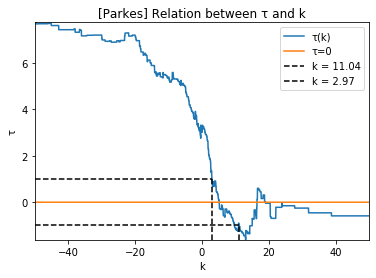

In [18]:
k1, kn1, k0 = round(k1, 2), round(kn1, 2), round(k0, 2)

YMAX, YMIN = max(list_t), min(list_t)
XMAX, XMIN = k_max, k_min
MAR = 0 #margin
XMAR = MAR/10 * (abs(XMAX)+abs(XMIN)) #scaling the xmargin
YMAR = MAR/10 * (abs(YMAX)+abs(YMIN)) #scaling the ymargin

PLOT_LINES = True

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(list_k, list_t, label='τ(k)')
ax.plot(list_k, [0 for i in range(len(list_k))], label='τ=0')

if PLOT_LINES:
    ax.plot([k1 for i in range(11)], [YMIN+(1-YMIN)*i/10 for i in range(11)], color='black', linestyle='--', label='k = ' + str(kn1))
    ax.plot([kn1 for i in range(11)], [YMIN+(-1-YMIN)*i/10 for i in range(11)], color='black', linestyle='--', label='k = ' + str(k1))
    ax.plot([XMIN + (k1-XMIN)*i/10 for i in range(11)],[1 for i in range(11)], color='black', linestyle='--')
    ax.plot([XMIN + (kn1-XMIN)*i/10 for i in range(11)],[-1 for i in range(11)], color='black', linestyle='--')

ax.set_ylim([YMIN-YMAR, YMAX+YMAR])
ax.set_xlim([XMIN-XMAR, XMAX+XMAR])
ax.set_xlabel('k')  # Add an x-label to the axes.
ax.set_ylabel('τ')  # Add a y-label to the axes.
ax.plot()

ax.set_title("[" + telname + "] Relation between τ and k")  # Add a title to the axes.
ax.legend()  # Add a legend.

hide_toggle()

### graph of L' vs. z

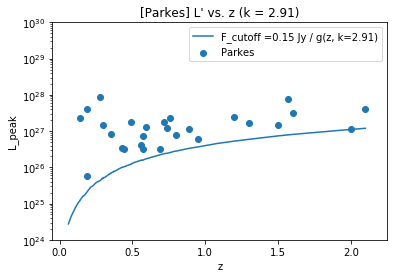

In [16]:
K = 2.91

L_cutoffs = []
for i in range(len(z)):
    L_cutoffs.append(L_lim1(F_LIM, z[i], d_L[i], g=g_new, k=K))

z_throwaway, L_cutoffs = sort_by_first(z, L_cutoffs)

fig, ax = plt.subplots()
plt.yscale('log')
ax.scatter(z[tel], new_L(L_p[tel], z[tel], k=K, g=g_new), label=telname)
ax.plot(z_throwaway, L_cutoffs, label='F_cutoff ='+str(F_LIM) + ' Jy / g(z, k=' + str(K) + ")")
ax.set_ylim([1e24, 1e30])
ax.set_xlim([-0.05, 2.25])
ax.set_xlabel('z')
ax.set_ylabel('L_peak')
ax.set_title('['+ telname+ '] L\' vs. z (k = ' + str(K) + ')')
ax.legend()

hide_toggle()

# doing some line fitting

### logz, logL, np.polyfit

In [17]:
logz = np.log10(1+np.array(z))
logL = np.log10(L_p)

mA, bA = np.polyfit(logz[:27], logL[:27], 1)
print(mA, bA)
mP, bP = np.polyfit(logz[27:54], logL[27:54], 1)
print(mP, bP)
mC, bC = np.polyfit(logz[54:], logL[54:], 1)
print(mC, bC)

hide_toggle()

8.153290318266096 26.926884643288847
3.165259005102575 26.487312703186664
7.870002668162934 25.19002177384451


### best fit lines graphed

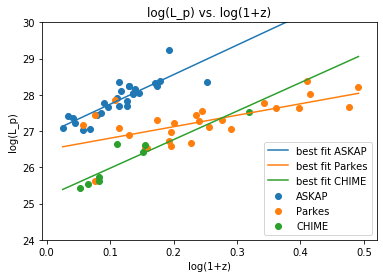

In [18]:
fig, ax = plt.subplots()
ax.scatter(logz[:27], logL[:27], label='ASKAP')
ax.plot(sorted(logz), mA*np.array(sorted(logz))+bA, label='best fit ASKAP')
ax.scatter(logz[27:54], logL[27:54], label='Parkes')
ax.plot(sorted(logz), mP*np.array(sorted(logz))+bP, label='best fit Parkes')
ax.scatter(logz[54:], logL[54:], label='CHIME')
ax.plot(sorted(logz), mC*np.array(sorted(logz))+bC, label='best fit CHIME')
ax.set_ylim([24, 30])
ax.set_xlabel('log(1+z)')
ax.set_ylabel('log(L_p)')
ax.set_title('log(L_p) vs. log(1+z)')
ax.legend()

hide_toggle()

# Calculating new L_lim, combining into one

In [19]:
L_lim = []
f_lim = [14.8, 0.15, 0.30]
for i in range(len(f_p)):
    if(i < 27): #ASKAP
        L_lim.append(L_p[i] * f_lim[0]/f_p[i])
    elif(i >= 27 and i < 54): #Parkes
        L_lim.append(L_p[i] * f_lim[1]/f_p[i])
    elif(i >= 54): #CHIME
        L_lim.append(L_p[i] * f_lim[2]/f_p[i])

hide_toggle()

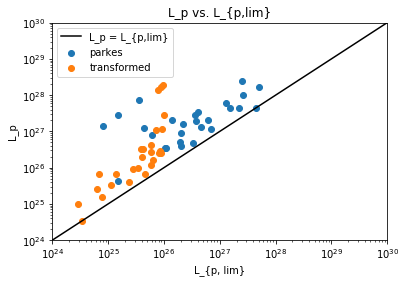

In [41]:
fig, ax = plt.subplots()
kval = 15
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(L_lim[27:54], L_p[27:54], label='parkes')
ax.scatter(new_L(L_lim[27:54], z[27:54], k=kval, g=g_new),
          new_L(L_p[27:54], z[27:54], k=kval, g=g_new), label = 'transformed')
ax.plot([1e20, 1e32], [1e20, 1e32], label='L_p = L_{p,lim}', color='black')
ax.set_xlim([1e24, 1e30])
ax.set_ylim([1e24, 1e30])
ax.set_xlabel('L_{p, lim}')
ax.set_ylabel('L_p')
ax.set_title('L_p vs. L_{p,lim}')
ax.legend()
plt.show()
hide_toggle()

In [56]:
def L_lim2(F_lim, L_plimi):
    return L_plimi

def tau_k2(L_p, L_plim, k, func=L_lim2, g=g_new):
    L_new = new_L(L_p, z, k=k, g=g)
    L_pnew = new_L(L_plim, z, k=k, g=g)
    return kendall_tau(L_new, L_pnew, 0.15, func=func) #note 0.15 won't be used, won't matter

In [57]:
#plot tau for multiple values of k
k_min = -20
k_max = 20
dk = 0.01

#the current k value
k = k_min

#list of k, tau
list_k = []
list_t = []

k1 = k_min #k closest to tau = 1
kn1 = k_min #k closest to tau = -1
k0 = k_min #k closest to t=0

dif1 = 1e300 #smallest distance so far to tau = 1
difn1 = 1e300 #smallest distance so far to tau = -1
dif0 = 1e300

while(k <= k_max):
    list_k.append(k)
    t_k = tau_k2(L_p, L_lim, k, g=g_new)
    list_t.append(t_k)
    
    if(abs(t_k-1) < dif1):
        dif1 = abs(t_k-1)
        k1 = k
    if(abs(t_k+1) < difn1):
        difn1 = abs(t_k+1)
        kn1 = k
    if(abs(t_k) < dif0):
        dif0 = abs(t_k)
        k0 = k
    
    k += dk

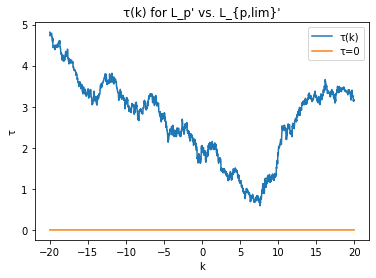

In [66]:
YMAX, YMIN = max(list_t), min(list_t)
XMAX, XMIN = k_max, k_min
MAR = 0 #margin

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(list_k, list_t, label='τ(k)')
ax.plot(list_k, [0 for i in range(len(list_k))], label='τ=0')
#ax.plot([k1 for i in range(11)], [YMIN+(1-YMIN)*i/10 for i in range(11)], color='black', linestyle='--', label='k = 1.25')
#ax.plot([kn1 for i in range(11)], [YMIN+(-1-YMIN)*i/10 for i in range(11)], color='black', linestyle='--', label='k = 4.75')
#ax.plot([XMIN + (k1-XMIN)*i/10 for i in range(11)],[1 for i in range(11)], color='black', linestyle='--')
#ax.plot([XMIN + (kn1-XMIN)*i/10 for i in range(11)],[-1 for i in range(11)], color='black', linestyle='--')
#ax.set_ylim([YMIN-MAR, YMAX+MAR])
#ax.set_xlim([XMIN-MAR, XMAX+MAR])
ax.set_xlabel('k')  # Add an x-label to the axes.
ax.set_ylabel('τ')  # Add a y-label to the axes.
ax.plot()

ax.set_title("τ(k) for L_p\' vs. L_{p,lim}\'")  # Add a title to the axes.
ax.legend()  # Add a legend.

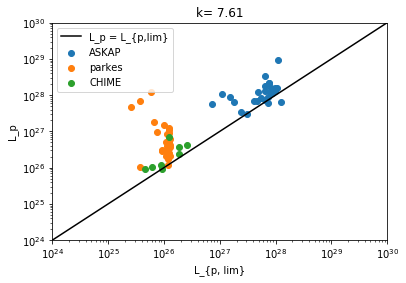

In [67]:
L_p_ = new_L(L_p, z, k=k0, g=g_new)
L_lim_ = new_L(L_lim, z, k=k0, g=g_new)


fig, ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(L_lim_[:27], L_p_[:27], label='ASKAP')
ax.scatter(L_lim_[27:54], L_p_[27:54], label='parkes')
ax.scatter(L_lim_[54:], L_p_[54:], label='CHIME')
ax.plot([1e20, 1e32], [1e20, 1e32], label='L_p = L_{p,lim}', color='black')
ax.set_xlim([1e24, 1e30])
ax.set_ylim([1e24, 1e30])
ax.set_xlabel('L_{p, lim}')
ax.set_ylabel('L_p')
ax.set_title('k= 7.61')
ax.legend()
plt.show()

In [45]:
k0

7.610000000000209